# Etude et analyse comparative des méthodes de clustering 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics 
from sklearn.neighbors import NearestNeighbors

path = './dataset/'

## Jeu de données x1

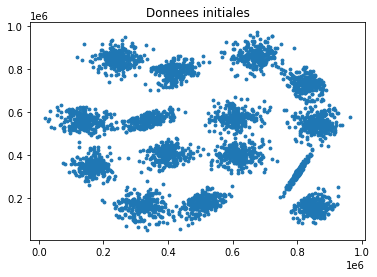

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

filename = "x1.txt"
databrut = pd.read_csv(path+filename, sep =" ", skipinitialspace=True)
data = databrut
datanp = databrut.to_numpy()
f0 = [f[0] for f in datanp]
f1 = [f[1] for f in datanp]

plt.scatter(f0, f1, s=8) #s= : taille des points sur le graphique
plt.title("Donnees initiales")
plt.show()

#############################
###        K-Means        ###
#############################

## Ici on détermine k le nombre de clusters optimal
for k in range (2,20):
    
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    #print("\n///////////////// k = ",k,"/////////////////")
    sil=metrics.silhouette_score(datanp, labels, metric='euclidean')
    #print("indice de silhouette :", sil)
    #print("indice de DB :", davies_bouldin_score(datanp, labels))
    



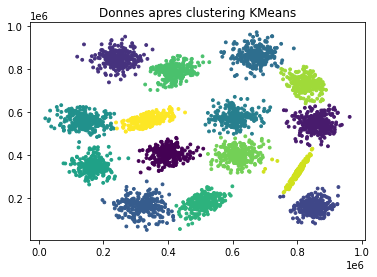

nb clusters = 15 , nb iter = 3 , runtime =  64.77 ms


In [3]:
#On choisit k=15 grâce aux résultats précédents
tps1 = time.time()
model = cluster.KMeans(n_clusters=15, init='k-means++')
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnes apres clustering KMeans")
plt.show()
print("nb clusters =",15,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")



In [4]:
#############################
###       K-Medoids       ###
#############################

from sklearn import metrics
import kmedoids
from sklearn . metrics . pairwise import euclidean_distances
from sklearn . metrics . pairwise import manhattan_distances

# 15 nombre de clusters : 
k = 15
tps1 = time . time ()
distmatrix = manhattan_distances ( datanp )
fp = kmedoids . fasterpam ( distmatrix , k )
tps2 = time . time ()
iter_kmed = fp . n_iter
labels_kmed = fp . labels
print("\n///////////////// k = ",k,"/////////////////")
print ( " Loss with FasterPAM : " , fp . loss )
sil=metrics.silhouette_score(distmatrix, labels_kmed, metric='manhattan')
print("indice de DB :", davies_bouldin_score(distmatrix, labels_kmed))
print("indice de silhouette :", sil)






///////////////// k =  15 /////////////////
 Loss with FasterPAM :  213754531.0
indice de DB : 0.3873419634380644
indice de silhouette : 0.7021992643818853


In [5]:
##############################
###      Agglomératif      ###
##############################


In [6]:
##############################
###         DBSCAN         ###
##############################

In [7]:
#############################
###        HDBSCAN        ###
#############################

## Jeu de données x2

## Jeu de données x3

## Jeu de données x4

## Jeu de données y1

## Jeu de données zz1

## Jeu de données zz2

## 4. Clustering DBSCAN et HDBSCAN


### DBSCAN 

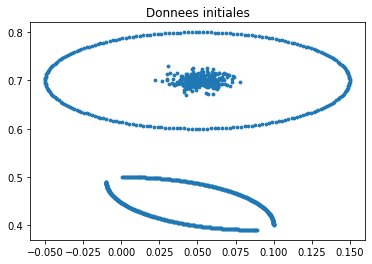

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import arff 
from sklearn.preprocessing import StandardScaler

path='./artificial/'
databrut = arff.loadarff(open(path+"donutcurves.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
plt.scatter(f0, f1, s=8) #s= : taille des points sur le graphique
plt.title("Donnees initiales")
plt.show()

#compound.arff marche ? cuboids ? Curves marche insh donut3 aussi donutcurves
#blobs.arff longsquare impossible atom marche pas 


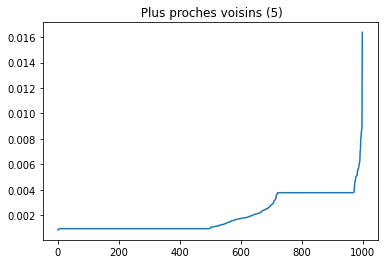

In [19]:
# Distances k plus proches voisins
# Donnees dans X
k=5
neigh = NearestNeighbors ( n_neighbors =k )
neigh.fit (data)
distances, indices = neigh.kneighbors(data)
# retirer le point " origine "
newDistances = np.asarray ([np.average(distances[i][1:]) for i in range (0,distances.shape[0])])
trie = np.sort(newDistances)

plt.title(" Plus proches voisins (5)")
plt.plot(trie) ;
plt.show()



In [73]:
## Méthode DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn import metrics


db = DBSCAN(eps=0.05, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 0


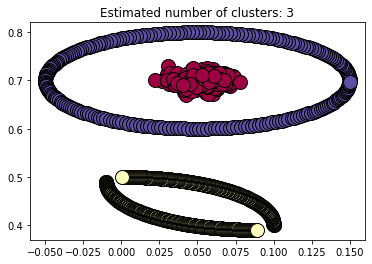

In [74]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = np.array(data)[(class_member_mask & core_samples_mask)]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = np.array(data)[(class_member_mask & ~core_samples_mask)]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### HDBSCAN

In [87]:
## Méthode DBSCAN 
from sklearn import metrics
import hdbscan

db = HDBSCAN(min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

ImportError: numpy.core.multiarray failed to import